## Ejercicio 1: Clustering Básico con K-Means 

Silhouette Score: 0.85


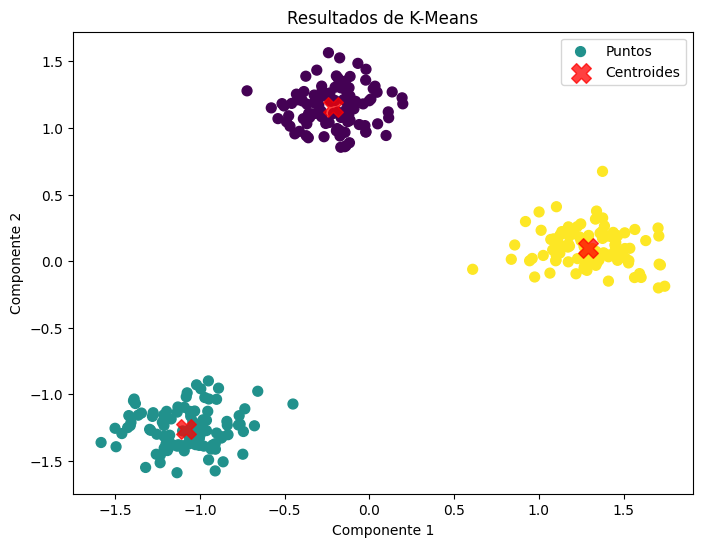

In [2]:
# Ejercicio 1: Clustering Básico con K-Means
# Genera un dataset sintético con 300 puntos en 2D, distribuidos en 3 clústeres. Aplica K-Means para
# identificar los clústeres y visualiza los resultados.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Generar un dataset sintético
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X_scaled)
# Predecir los clústeres
y_kmeans = kmeans.predict(X_scaled)
# Calcular el puntaje de silueta
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")
# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Puntos')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title('Resultados de K-Means')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

## Ejercicio 2: Selección del Número Óptimo de Clústeres

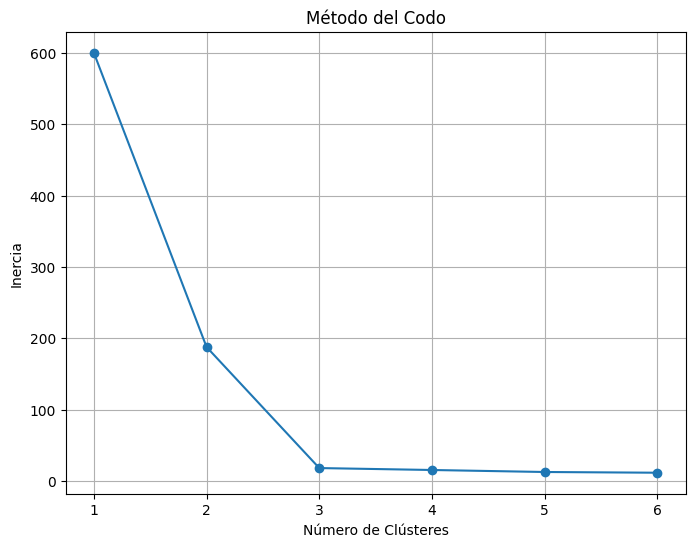

In [2]:
# Usando el dataset del ejercicio 1, aplica el método del codo para determinar el número óptimo de clústeres
# (prueba de 1 a 6 clústeres).

# Aplicar el método del codo
inertia = []
for n in range(1, 7):
    kmeans = KMeans(n_clusters=n, random_state=random_state)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(range(1, 7))
plt.grid()
plt.show()


**A partir de 3 tiende a cero la inercia por lo cual se considera que en adelante se tiene un buen modelo, y según la gráfica de ejercicio 1 se confirma.**

## Utilizar conjunto de datos 

In [4]:
path_datos = './datos/dataset_ej1.csv'

df = pd.read_csv(path_datos)
df.head(5)

,x,y
0,-7.338988,-7.729954
1,-7.740041,-7.264665
2,-1.686653,7.793442
3,4.422198,3.071947
4,-8.917752,-7.888196


Silhouette Score: 0.85


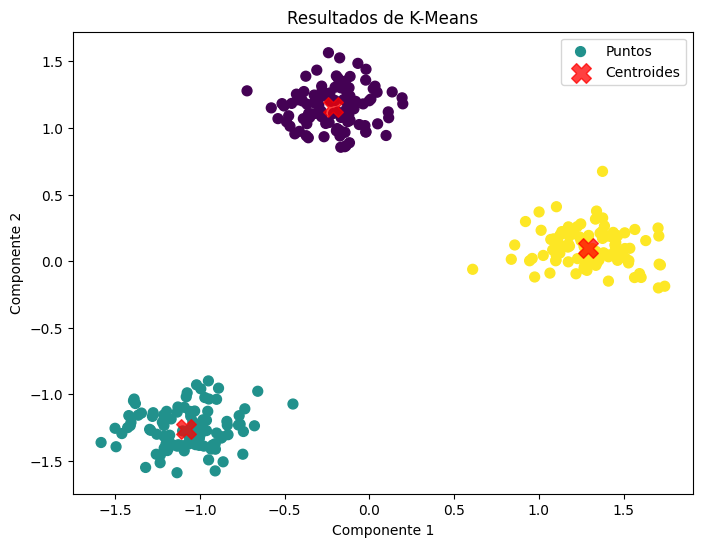

In [7]:
# aplicar kmeans al dataset
X = df[['x', 'y']].values

n_clusters = 3
random_state = 42

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X_scaled)
# Predecir los clústeres
y_kmeans = kmeans.predict(X_scaled)
# Calcular el puntaje de silueta
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")
# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Puntos')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title('Resultados de K-Means')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
# Ajuste: asegúrate de que X tenga dos columnas (x, y)
# Si X tiene solo una columna, usa df[['x', 'y']].values para obtener ambas
if X.shape[1] == 1 and 'y' in df.columns:
    X = df[['x', 'y']].values
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X_scaled)
    y_kmeans = kmeans.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_kmeans)
    print(f"Silhouette Score: {silhouette_avg:.2f}")
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Puntos')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
    plt.title('Resultados de K-Means')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.show()

